In [440]:
import numpy as np

import pandas as pd
import matplotlib as plt
import math
import random

%matplotlib inline


In [441]:

# R replaced with 0 andf M with 1
data=pd.read_csv("sonar_all.csv")
data=data.sample(frac=1)
# data.describe()
data_input=data.iloc[:,0:60]
data_input.iloc[:,59]

data_output=data.iloc[:,60:61]
data_output ,data_input
test_idx=0
# test_signal=0
# computing number of rows
# rows = len(data.axes[0])
 
# computing number of columns
# cols = len(data.axes[1])
# cols
# data.info()



In [442]:
data.describe()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,0
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523,0.536232
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038,0.499894
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100,0.000000
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300,1.000000
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [443]:
#creating dataset
# dataset_inputs=[[5.1, 3.5, 1.4, 0.2],[4.9, 3.0, 1.4, 0.2],[7.0, 3.2, 4.7, 1.4],[ 6.4, 3.2, 4.5, 1.5],[ 6.3, 3.3, 6.0, 2.5],[5.8, 2.7, 5.1, 1.9]]
# dataset_outputs=[[1.0, 0.0, 0.0],[1.0, 0.0, 0.0],[0.0, 1.0, 0.0],[0.0, 1.0, 0.0 ],[0.0, 0.0, 1.0],[ 0.0, 0.0, 1.0]]
dataset_inputs=data_input.values.tolist()
dataset_outputs=data_output.values.tolist()

error_each_epoch=[]
test_error_each_epoch=[]
#at index 0 R and index 1 M
for i in range(len(dataset_outputs)):
    if dataset_outputs[i][0]==0:
        dataset_outputs[i][0]=1
        dataset_outputs[i].append(0)
    else:
        dataset_outputs[i][0]=0
        dataset_outputs[i].append(1)    
len(dataset_outputs[0])
dataset_outputs

[[0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 

In [444]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

# Derivative of sigmoid function


def derSigmoid(x):
    return (x)*(1.0-(x))


In [445]:
# Input data
# create a np vector of iput_size elements
no_inp_neuron = len(dataset_inputs[0])
no_hid_neuron = 5
no_out_neuron = len(dataset_outputs[0])
learning_rate = 0.05
bias_cnt = 1

inputs = np.zeros(no_inp_neuron + bias_cnt)
hidden = np.zeros(no_hid_neuron + bias_cnt)
outputs = np.zeros(no_out_neuron)
error_sum=0.0
inputs[no_inp_neuron]=1.0
hidden[no_hid_neuron]=1.0


wts_hdn_inpt = np.random.rand(no_hid_neuron, no_inp_neuron + bias_cnt)
wts_hdn_inpt
wts_output_hdn = np.random.rand(no_out_neuron, no_hid_neuron + bias_cnt)
"out -hdn", wts_output_hdn, "hdn -inp", wts_hdn_inpt


('out -hdn',
 array([[0.24688917, 0.4926981 , 0.9894536 , 0.17456127, 0.6324453 ,
         0.98498733],
        [0.39472375, 0.04819084, 0.26232807, 0.22606814, 0.34092088,
         0.89355547]]),
 'hdn -inp',
 array([[6.14539505e-01, 1.35827399e-01, 8.05350102e-02, 4.48965276e-01,
         6.06772936e-01, 2.96472053e-01, 8.43125181e-01, 4.20431189e-01,
         7.47115146e-01, 2.47954039e-01, 2.46189916e-01, 9.04707300e-01,
         5.86511645e-01, 1.20989389e-01, 9.02963726e-01, 3.54854815e-01,
         3.07298755e-01, 6.67433402e-02, 2.42894423e-01, 4.61241673e-01,
         4.78624115e-01, 7.13897393e-01, 2.35603745e-01, 2.41564487e-01,
         2.22875106e-02, 1.99411288e-02, 4.88113490e-01, 8.80242852e-01,
         4.68346287e-02, 5.33611269e-01, 6.70149422e-01, 5.17151986e-01,
         7.47906396e-01, 2.18899870e-01, 3.94340639e-01, 6.49509266e-01,
         9.08802260e-01, 4.00971528e-01, 6.26949580e-01, 7.75075756e-01,
         4.73432130e-01, 7.94385839e-01, 3.83555851e-01, 7.8

In [446]:
# def build_neurons(inp_neuron, hid_neuron, out_neuron):
#     input_layer_vals = [0]*(inp_neuron+1)
#     hid_layer_vals = [0]*(hid_neuron+1)
#     out_layer_vals = [0]*(out_neuron+1)

#     return input_layer_vals, hid_layer_vals, out_layer_vals


In [447]:
# def init_weights(wts_hdn_inpt, wts_output_hdn):
#     wts_hdn_inpt = np.random.rand(no_hid_neuron, no_inp_neuron + bias_cnt)
#     wts_output_hdn = np.random.rand(no_out_neuron, no_hid_neuron + bias_cnt)
#     return wts_hdn_inpt, wts_output_hdn


In [448]:
# build_neurons(no_inp_neuron, no_hid_neuron, no_out_neuron)
# init_weights(wts_hdn_inpt, wts_output_hdn)


In [449]:
def NN_feed_forward(test_signal=1) :
    print("ff called")
    # hidden layer output
    
    # test_signal=1
    for i in range(no_hid_neuron) :
        hidden[i]=0.0
        for j in range(no_inp_neuron + bias_cnt) :
            hidden[i] += inputs[j] * wts_hdn_inpt[i][j]
        hidden[i] = sigmoid(hidden[i])
    # output layer output
    for i in range(no_out_neuron ) :
        outputs[i]=0.0
        for j in range(no_hid_neuron + bias_cnt) :
            outputs[i] += hidden[j] * wts_output_hdn[i][j]
        outputs[i] = sigmoid(outputs[i])


    #calculate error on testing
    
    print("test signal" , test_signal )
    if(test_signal==1):
        test_err_sum=0.0
        for i in range(no_out_neuron):
            test_err_sum+=(dataset_outputs[test_idx][i]-outputs[i])**2

        test_err_sum/=no_out_neuron
        test_error_each_epoch.append(np.sqrt (test_err_sum))

    
            
    # perform winner takes all for output layer
    max=outputs[0]
    best=0
    for i in range(no_out_neuron):
        if outputs[i]>max:
            best=i
            max=outputs[i]
    return best

In [450]:
def NN_back_prop(test):
    print("back-prop called")
    err_out=[0]*(no_out_neuron)
    err_hid=[0]*(no_hid_neuron)
   
    
    error_sum=0.0    

    #calculate output node error(calculating local gradient of output layer)
    for out in range(no_out_neuron):
        err_out[out]=(dataset_outputs[test][out]-outputs[out])*derSigmoid(outputs[out])
        error_sum+=(dataset_outputs[test][out]-outputs[out])**2

    error_sum/=no_out_neuron
    error_each_epoch.append(np.sqrt (error_sum))

   

    #calculate hidden node error(calculating local gradient of hidden layer)
    for hid in range(no_hid_neuron):
        err_hid[hid]=0.0
        for out in range(no_out_neuron):
            err_hid[hid]+=err_out[out]*wts_output_hdn[out][hid]
        err_hid[hid]*=derSigmoid(hidden[hid])    

    #adjust the hidden to output layer weights(delta (w)=n*local_gradient*input_signal)
    for out in range(no_out_neuron):
        for hid in range(no_hid_neuron):
            wts_output_hdn[out][hid]+=learning_rate*err_out[out]*hidden[hid]
    
    #adjust the input to hidden layer weights 
    for hid in range(no_hid_neuron):
        for inp in range(no_inp_neuron+bias_cnt):
            wts_hdn_inpt[hid][inp]+=learning_rate*err_hid[hid]*inputs[inp]
        
    

In [451]:
def NN_set_inputs(test):
    for i in range(no_inp_neuron):
        inputs[i]=dataset_inputs[test][i]


In [452]:
len(data_input)

207

In [453]:
def NN_Train(iterations):
    for i in range(iterations):
        idx=random.randint(0,len(dataset_inputs)-50)
        # idx = i%len(data_input)
        NN_set_inputs(idx)
        NN_feed_forward(0)
        NN_back_prop(idx)
        


In [454]:

def NN_Test(tests):
    
    for i in range(150,tests):
        print("i val" ,i )
        idx=random.randint(150,200)
        test_idx=idx
        NN_set_inputs(idx)
        NN_feed_forward()
        # if result==0:
        #  print(f"Test {i} classified as result= M desired output= {dataset_outputs[i][0]}")
         
        # else:
        #  print(f"Test {i} classified as result= R desired output= {dataset_outputs[i][0]}") 

In [455]:
NN_Train(200)
NN_Test(200)

ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test signal 0
back-prop called
ff called
test s

In [456]:
print(len(error_each_epoch))


200


Text(0, 0.5, 'MSE')

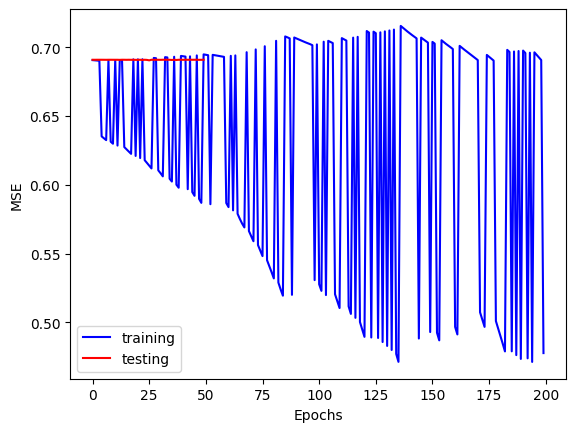

In [457]:
import matplotlib.pyplot as plt

# plt.plot(number,error_each_epoch)
# plt.xlabel('epochs')
# # naming the y axis
# plt.ylabel('sqaured mean error')
  
# # giving a title to my graph
# plt.title('error vs epoch')
# plt.legend("logistic")  
# # function to show the plot

# number=[i for i in range (1,201)]
# plt.plot(number,test_error_each_epoch)
# plt.xlabel('epochs')
# naming the y axis
# plt.ylabel('sqaured mean error')
  
# # giving a title to my graph
# plt.title('error vs epoch')
# plt.legend("error") 
# plt.show()
# number=[i for i in range (1,201)]
# number1=[i for i in range (0,50)]

plt.plot(error_each_epoch, color='b', label='training')
plt.plot(test_error_each_epoch, color='r', label='testing')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MSE')

[0.6908850103325804, 0.6908701264669852, 0.6908935828432977, 0.6908911339087215, 0.6908877073107742, 0.6908744210662473, 0.6908524453028806, 0.6908824452228588, 0.6908885214203317, 0.6908770651192205, 0.6908662951085276, 0.6908701264669852, 0.6908150276004401, 0.6908995532099328, 0.6908833264744747, 0.6908521123636117, 0.6908896247241106, 0.6908445903258856, 0.6908724243668313, 0.6908150276004401, 0.6908173415210974, 0.690888191929947, 0.6907389751845577, 0.6908892791915467, 0.6907842875931212, 0.6904647431628921, 0.690888191929947, 0.6908347178029149, 0.6908911339087215, 0.6908724243668313, 0.6908347178029149, 0.6908935828432977, 0.6908956761080495, 0.6908850103325804, 0.6908524453028806, 0.6907389751845577, 0.6908724243668313, 0.6907389751845577, 0.6908850103325804, 0.6908850103325804, 0.6908524453028806, 0.6908896247241106, 0.6908770651192205, 0.6908935828432977, 0.6908831537498334, 0.690890966041755, 0.6908956761080495, 0.6908279927439434, 0.6908521123636117, 0.6908973428726366]


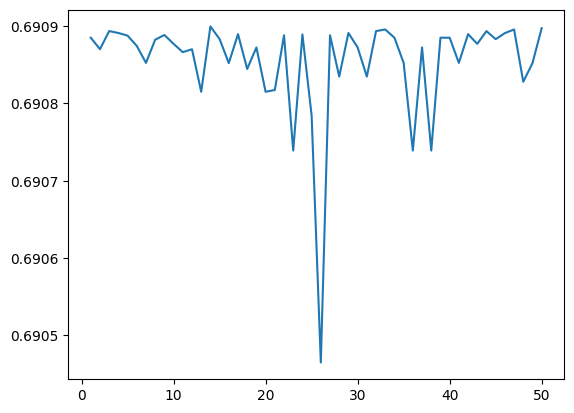

In [458]:
number=[i for i in range (1,51)]
len(test_error_each_epoch)
plt.plot(number,test_error_each_epoch)
print(test_error_each_epoch)